# Chong Zhen Jie A0201613Y
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from odeintw import odeintw

In [2]:
sns.set_theme(font_scale=1.5)
%load_ext memory_profiler

# Project Part IV: Question 4 using the RDE

In [3]:
# Set parameters
x0 = 1
v0 = 0
w0 = np.array([[x0], [v0]])

t0, t1 = 0, 1
t_list = np.linspace(t0, t1, 101)
t_list_rev = np.flip(t_list)

param = 1e-2 # value of lambda
R = np.array([[param]])
B = np.array([[0],[1]])
M = np.array([[1,0],[0,0]])

def compute_A(fn):
    return lambda t: np.array([[0.,1], [0,-fn(t)]])
fn1 = lambda t: np.sin(10*t)
fn2 = lambda t: t**2
A1 = compute_A(fn1)
A2 = compute_A(fn2)

# Define functions to compute the derivatives
def dPdt(P, t, A):
    return -P@A(t) - A(t).T@P + P@B@np.linalg.inv(R)@B.T@P

def dwdt(w, t, A, P):
    # Retrieve corresponding P(t) by indexing from the back
    return A(t)@w + (B@(-np.linalg.inv(R)@B.T@P[-int(t*100)]@w))

In [4]:
# Define function to solve problem using RDE
def RDE(A):
    # Solve RDE for P, integrating backward in time for t in [1,0]
    P = odeintw(dPdt, M, t_list_rev, args=(A,))
    
    # Solve for x and v, integrating forward in time for t in [0,1]
    w = odeintw(dwdt, w0, t_list, args=(A, P))
    x, v = w[:, 0], w[:, 1]
    
    # Compute u; P is flipped to get back the same order of increasing time
    u = [(-np.linalg.inv(R)@B.T@P_t@w_t)[0] for P_t,w_t in zip(np.flip(P),w)]
    
    return P, x, v, u

In [5]:
# Run solver
P1, x1, v1, u1 = RDE(A1)
P2, x2, v2, u2 = RDE(A2)

In [6]:
# Check peak memory usage: around 126.5 MiB
# %memit RDE(A1)
# %memit RDE(A2)

In [7]:
# Check mean running time
# %timeit -r5 -n10 RDE(A1) # around 180 ms
# %timeit -r5 -n10 RDE(A2) # around 170 ms

In [8]:
print(f"Estimated final position for sin(10t): {x1[-1][0]}")
print(f"Estimated final position for t^2: {x2[-1][0]}")

Estimated final position for sin(10t): 0.05137190637309329
Estimated final position for t^2: 0.05411054944003505


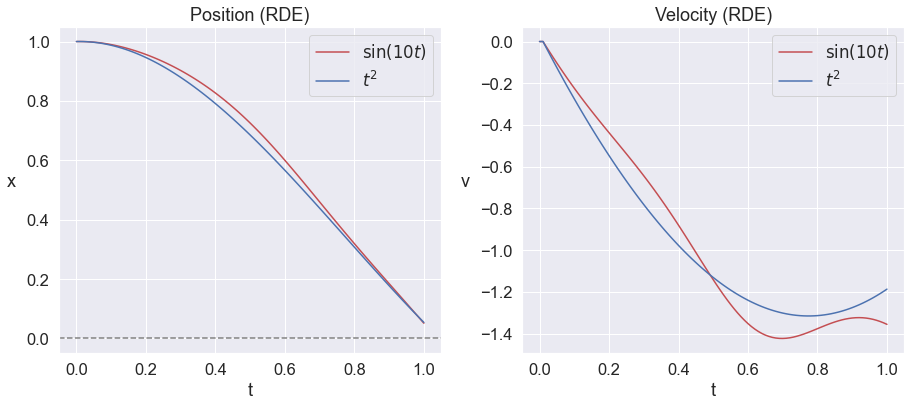

In [9]:
# Plot results for x and v over t_list
plt.figure(figsize=(13,6), tight_layout=True)

def plot_custom(input1, input2, ylabel, title):
    plt.plot(t_list, input1, label="$\sin(10t)$", c="r")
    plt.plot(t_list, input2, label="$t^2$", c="b")
    plt.xlabel("t")
    plt.ylabel(ylabel, rotation="horizontal", labelpad=15)
    plt.title(title)
    plt.legend()
    
plt.subplot(1,2,1)
plot_custom(x1, x2, "x", "Position (RDE)")
# Reference line
plt.axhline(0, ls="--", c="grey")

plt.subplot(1,2,2)
plot_custom(v1, v2, "v", "Velocity (RDE)")

plt.show()

---